# Clean data, handle missing values, encode categorical variables, feature engineering, Split train and test sets


# 1 Clean Data


In [ ]:
pip install seaborn matplotlib pandas numpy

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load craw data from csv file
df = pd.read_csv('../data/products.csv')

In [6]:
# Check shape of the data
df.shape

(2585, 38)

In [76]:
# Check missing values and % data missing
print(df.isnull().sum() / df.shape[0] * 100)

Price                0.000000
CASE_MATERIAL        0.137615
CASE_SHAPE           0.321101
CASE_BACK           14.587156
BAND_MATERIAL        0.091743
BAND_TYPE            0.458716
BAND_COLOR           5.091743
CLASP               12.339450
DIAL_COLOR           0.183486
TYPE                 0.183486
CRYSTAL              3.348624
HANDS                2.752294
DIAL_MARKERS         5.458716
SECOND_MARKERS      29.403670
BEZEL                4.541284
BEZEL_COLOR         18.256881
BEZEL_MATERIAL       6.055046
BRAND                0.000000
COLLECTION_NAME      5.458716
GENDER               0.000000
MODEL                0.000000
MOVEMENT             0.229358
ENGINE              38.577982
CALENDAR            37.522936
FUNCTIONS            0.183486
WATCH_FEATURES       0.000000
WATCH_STYLE          1.651376
CASE_DIAMETER        3.532110
WATER_RESISTANCE     3.715596
CASE_THICKNESS      38.899083
gender_encoded       0.000000
dtype: float64


In [77]:
# Remove redundant columns that are not needed for analysis machine learning
cols_to_drop = ['URL', 'JOMASHOP_SKU', 'DEPARTMENT', 'CATEGORY', 'CROWN', 'WATCH_LABEL']
# Drop columns if exists
for col in cols_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True) 
print("Còn lại các cột:")
print(df.columns.tolist())
df.to_csv('../data/products_cleaned_v2.csv', index=False)

Còn lại các cột:
['Price', 'CASE_MATERIAL', 'CASE_SHAPE', 'CASE_BACK', 'BAND_MATERIAL', 'BAND_TYPE', 'BAND_COLOR', 'CLASP', 'DIAL_COLOR', 'TYPE', 'CRYSTAL', 'HANDS', 'DIAL_MARKERS', 'SECOND_MARKERS', 'BEZEL', 'BEZEL_COLOR', 'BEZEL_MATERIAL', 'BRAND', 'COLLECTION_NAME', 'GENDER', 'MODEL', 'MOVEMENT', 'ENGINE', 'CALENDAR', 'FUNCTIONS', 'WATCH_FEATURES', 'WATCH_STYLE', 'CASE_DIAMETER', 'WATER_RESISTANCE', 'CASE_THICKNESS', 'gender_encoded']


In [ ]:
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned_v2.csv', index=False)

In [78]:
# Ngưỡng 30% (threshold = 0.3): loại bỏ tất cả các cột có ≥ 30% giá trị thiếu.
# Các cột vượt ngưỡng:
# CASE_THICKNESS (44.6%)
# SECOND_MARKERS (40.5%)
# ENGINE (47.5%)
# CALENDAR (47.3%)
# CROWN (38.3%)
# CATEGORY (36.6%)
# WATCH_LABEL (30.5%)
# BEZEL_COLOR (31.1%)
# Ngưỡng 40% (threshold = 0.4): chỉ loại những cột missing ≥ 40%.
# CASE_THICKNESS, SECOND_MARKERS, ENGINE, CALENDAR
# Remove columns with more than 30% missing values
threshold = 0.3
missing_cols = df.columns[df.isnull().mean() > threshold]
print(f"Columns with more than {threshold * 100}% missing values: {missing_cols.tolist()}")
df = df.drop(columns=missing_cols)
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned_v2.csv', index=False)

Columns with more than 30.0% missing values: ['ENGINE', 'CALENDAR', 'CASE_THICKNESS']


In [79]:
# Standardize price column, remove all record that missing price
df = df[df['Price'].notna() & (df['Price'].astype(str).str.strip() != '')].copy()
df['Price'] = (
    df['Price']
    .astype(str)
    .str.extract(r'([\d,]+\.?\d*)')[0]
)
df = df[df['Price'].notna()].copy()
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Price,CASE_MATERIAL,CASE_SHAPE,CASE_BACK,BAND_MATERIAL,BAND_TYPE,BAND_COLOR,CLASP,DIAL_COLOR,TYPE,...,COLLECTION_NAME,GENDER,MODEL,MOVEMENT,FUNCTIONS,WATCH_FEATURES,WATCH_STYLE,CASE_DIAMETER,WATER_RESISTANCE,gender_encoded
0,534.0,Stainless Steel,Tonneau,Transparent,Stainless Steel,Bracelet,Silver-tone,Fold Over with Safety Release,Blue,Analog,...,PRX,MENS,T137.407.11.041.00,Automatic,"Date, Hour, Minute, Second","Analog, Stainless Steel",Casual,40.0,100.0,20683.796405
1,534.0,Stainless Steel,Tonneau,Transparent,Stainless Steel,Bracelet,Silver-tone,Fold Over with Safety Release,Blue,Analog,...,PRX,MENS,T137.407.11.041.00,Automatic,"Date, Hour, Minute, Second","Analog, Stainless Steel",Casual,40.0,100.0,20683.796405
2,27750.0,Titanium,Octagon,NaN,Titanium,Bracelet,Grey,Deployment with Push Button Release,Black,Analog,...,Royal Oak Offshore,MENS,25995IP.OO.1000TI.01,Automatic,"Date, Second Time Zone, Hour, Minute, Second","Analog, Power Reserve Indicator, Titanium, Tim...",Luxury,44.0,NaN,20683.796405
3,88.0,Alloy,Round,NaN,Leather,Strap,Blue,NaN,Blue,Analog,...,Monaco,MENS,M17970,Quartz,"Chronograph, Date, Hour, Minute, Second","Month, Analog, Leather, Chronograph",Casual,42.0,NaN,20683.796405
4,9318.0,Stainless Steel,Round,Solid,Stainless Steel Oyster,Bracelet,Silver-tone,Fold Over with Safety Release,Black,Analog,...,Explorer II,MENS,16570T BKSO,Automatic,"Date, GMT, Second Time Zone, Hour, Minute, Sec...","Time Zone, Stainless Steel, Analog, GMT, Chron...",Luxury,40.0,100.0,20683.796405


In [80]:
# Check the shape of the data after cleaning
print(f"Shape of the data after cleaning: {df.shape}")

Shape of the data after cleaning: (2180, 28)


In [81]:
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned_v2.csv', index=False)

## Remove all columns that only have one unique value


In [82]:
# Print unique values in each column
unique_counts = df.nunique()
print("Unique values in each column:")
print(unique_counts)

Unique values in each column:
Price               1422
CASE_MATERIAL        143
CASE_SHAPE            10
CASE_BACK             29
BAND_MATERIAL        246
BAND_TYPE              2
BAND_COLOR           124
CLASP                110
DIAL_COLOR           299
TYPE                   3
CRYSTAL               43
HANDS                219
DIAL_MARKERS         119
SECOND_MARKERS       214
BEZEL                 68
BEZEL_COLOR          126
BEZEL_MATERIAL       233
BRAND                161
COLLECTION_NAME     1015
GENDER                 3
MODEL               2178
MOVEMENT               4
FUNCTIONS            263
WATCH_FEATURES       456
WATCH_STYLE            9
CASE_DIAMETER         44
WATER_RESISTANCE      18
gender_encoded         3
dtype: int64


In [83]:
# Remove all columns that only have one unique value
df = df.loc[:, df.nunique() > 1]
print(f"Shape of the data after removing single unique value columns: {df.shape}")
df.to_csv('../data/products_cleaned.csv', index=False)

Shape of the data after removing single unique value columns: (2180, 28)


## Standardize Unit


In [85]:
df = pd.read_csv('../data/products_cleaned.csv')
# Standardize Unit and remove all unit
cols_with_units = {
    'CASE_DIAMETER': r'([\d\.]+)',                     # mm
    'WATER_RESISTANCE': r'([\d\.]+)',                  # meters
}

for col, regex in cols_with_units.items():
    # 1) Extract chuỗi số phù hợp
    df[col + '_num'] = df[col].astype(str).str.extract(regex)[0]
    
    # 2) Loại dấu phẩy (nếu có) rồi ép về float
    df[col + '_num'] = df[col + '_num'].str.replace(',', '').astype(float)

# Nếu muốn đổi tên và xóa cột gốc:
for col in list(cols_with_units):
    df = df.drop(columns=[col]).rename(columns={col + '_num': col})

# Kiểm tra kết quả
print(df[['CASE_DIAMETER', 'WATER_RESISTANCE']].head())

   CASE_DIAMETER  WATER_RESISTANCE
0           40.0             100.0
1           40.0             100.0
2           44.0               NaN
3           42.0               NaN
4           40.0             100.0


In [86]:
df.to_csv('../data/products_cleaned.csv', index=False)

In [88]:
# Check outliers in the all columns
def detect_outliers_iqr(df, unit_regex_map=None, multiplier=1.5):
    """
    Phát hiện outlier theo phương pháp IQR trên tất cả cột số:
    - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').
    - multiplier: hệ số nhân IQR (thường dùng 1.5).
    Trả về DataFrame summary với Q1, Q3, IQR, bounds và số outlier.
    """
    df_clean = df.copy()
    
    # 1. Nếu có map cột chứa đơn vị, extract và ép float
    if unit_regex_map:
        for col, regex in unit_regex_map.items():
            df_clean[col] = (
                df_clean[col].astype(str)
                .str.extract(regex)[0]             # lấy nhóm số
                .str.replace(',', '')              # bỏ dấu phẩy nếu có
            )
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # 2. Tự động chọn cột số
    num_cols = df_clean.select_dtypes(include=['number']).columns
    
    # 3. Tính IQR và đếm outliers
    summary = []
    for col in num_cols:
        series = df_clean[col].dropna()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - multiplier * iqr, q3 + multiplier * iqr
        outlier_count = series[(series < lower) | (series > upper)].shape[0]
        
        summary.append({
            'column': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'lower_bound': lower,
            'upper_bound': upper,
            'outliers_count': outlier_count
        })
    
    return pd.DataFrame(summary)

# Check outliers in the all numeric columns
num_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(num_cols.tolist())

# Check outliers from num_cols
unit_regex_map = {
    'CASE_DIAMETER': r'([\d\.]+)',                     # mm
    'WATER_RESISTANCE': r'([\d\.]+)',                  # m
}
outlier_summary = detect_outliers_iqr(df, unit_regex_map=unit_regex_map)
print("Outlier summary:")
print(outlier_summary)

Numeric columns:
['Price', 'gender_encoded', 'CASE_DIAMETER', 'WATER_RESISTANCE']
Outlier summary:
             column            Q1            Q3          IQR   lower_bound  \
0             Price    179.842500   9104.500000  8924.657500 -13207.143750   
1    gender_encoded  13196.204049  20683.796405  7487.592356   1964.815515   
2     CASE_DIAMETER     35.000000     42.000000     7.000000     24.500000   
3  WATER_RESISTANCE     30.000000    100.000000    70.000000    -75.000000   

    upper_bound  outliers_count  
0  22491.486250             285  
1  31915.184939               0  
2     52.500000              65  
3    205.000000             130  


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\1244309582.py:5: SyntaxWarning: invalid escape sequence '\d'
  - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').


# Encode Categorical Variables


In [ ]:
distinct_values = df['WARRANTY'].dropna().unique()
print("Distinct values in WARRANTY column:")
print(distinct_values)

In [ ]:
df.drop(columns=['WARRANTY'], inplace=True)

In [91]:
# Drop all rows that have 30% columns missing
threshold = 0.3
missing_rows = df[df.isnull().mean(axis=1) > threshold]
print(f"Rows with more than {threshold * 100}% missing values: {missing_rows.shape[0]}")
df = df.dropna(thresh=int(df.shape[1] * (1 - threshold)))
print(f"Shape of the data after dropping rows with more than {threshold * 100}% missing values: {df.shape}")
df.to_csv('../data/products_cleaned.csv', index=False)

Rows with more than 30.0% missing values: 0
Shape of the data after dropping rows with more than 30.0% missing values: (2180, 28)


C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\3251429345.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')


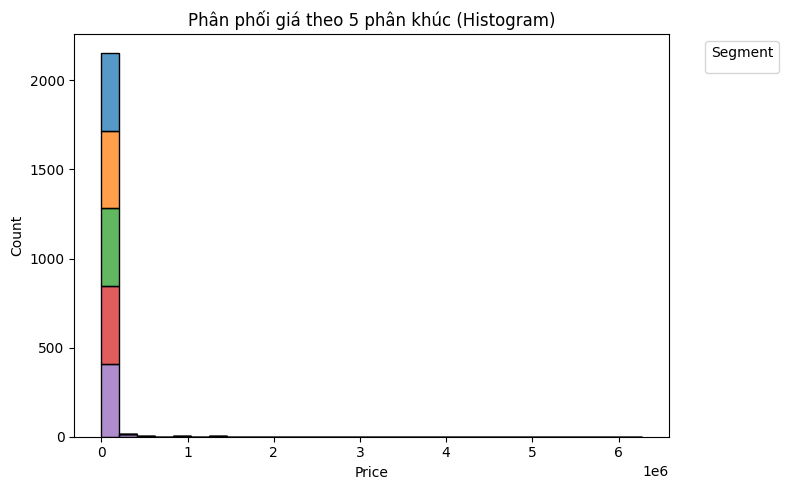

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\3251429345.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


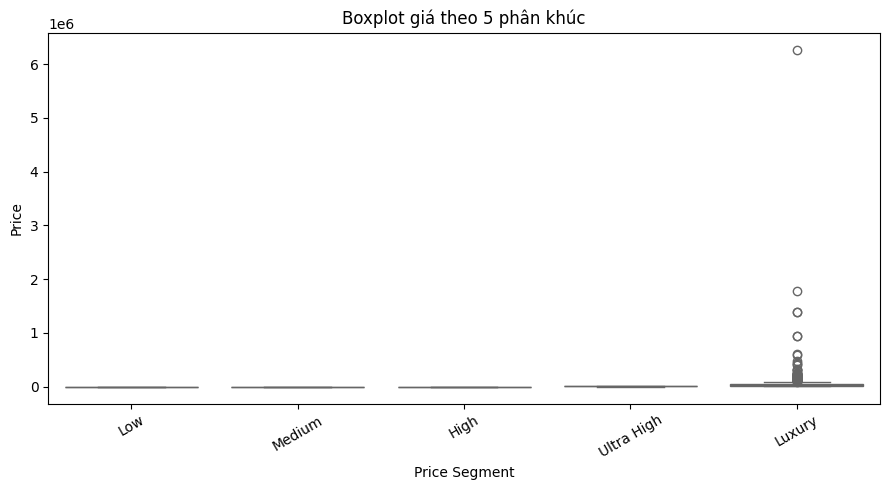

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\3251429345.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


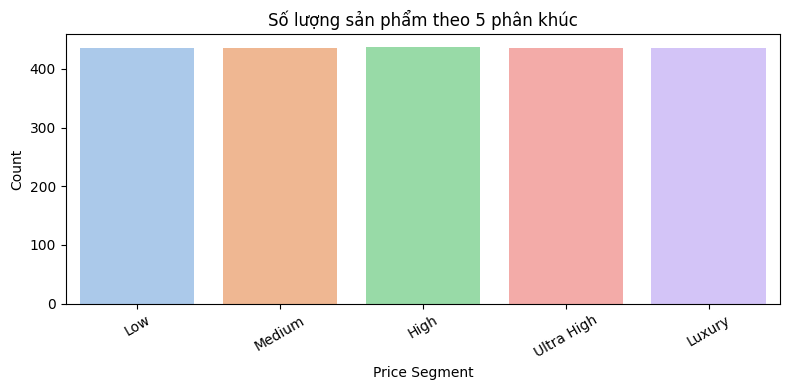

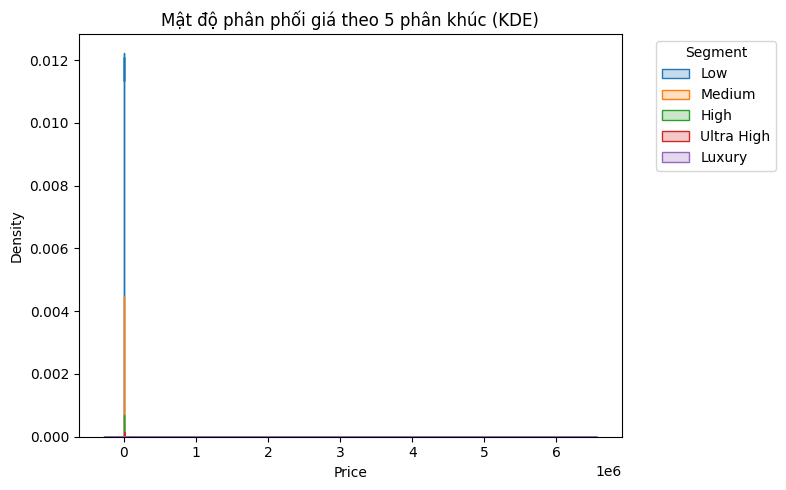

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\3251429345.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby('Price_Segment')['Price'].agg(['mean', 'min', 'max']).reindex(labels)


Price statistics by segment:
                       mean       min         max
Price_Segment                                    
Low               83.310963     29.00      134.38
Medium           273.848555    136.99      561.00
High            1438.415515    565.00     3150.00
Ultra High      6936.149195   3160.00    13320.00
Luxury         80984.533647  13335.00  6267500.00


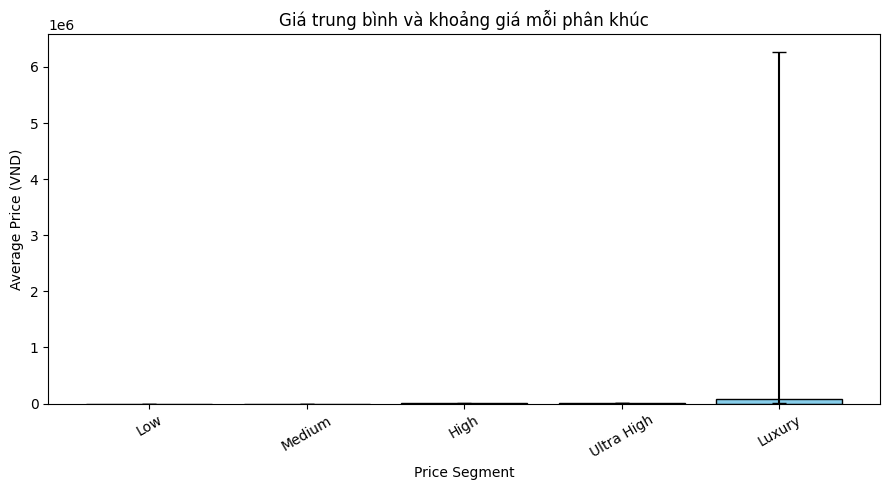

In [95]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df đã load và đã lọc giá > 400_000
labels = ['Low', 'Medium', 'High', 'Ultra High', 'Luxury']

# q=5 để chia thành 5 nhóm
df['Price_Segment'] = pd.qcut(df['Price'], q=5, labels=labels)

# Đảm bảo thứ tự hiển thị
order = labels

# 1) Histogram
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Price',
    hue='Price_Segment',
    bins=30,
    palette='tab10',
    multiple='stack',
    hue_order=order
)
plt.title("Phân phối giá theo 5 phân khúc (Histogram)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='Price_Segment',
    y='Price',
    order=order,
    palette='Set3'
)
plt.title("Boxplot giá theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3) Countplot
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='Price_Segment',
    order=order,
    palette='pastel'
)
plt.title("Số lượng sản phẩm theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 4) KDE Plot
plt.figure(figsize=(8, 5))
for seg in order:
    sns.kdeplot(
        data=df[df['Price_Segment'] == seg]['Price'],
        label=seg,
        fill=True
    )
plt.title("Mật độ phân phối giá theo 5 phân khúc (KDE)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tính giá trị min, max, mean
price_stats = df.groupby('Price_Segment')['Price'].agg(['mean', 'min', 'max']).reindex(labels)
print("Price statistics by segment:")
print(price_stats)
# Tính yerr: khoảng sai số (min-max)
yerr = np.array([
    price_stats['mean'] - price_stats['min'],
    price_stats['max'] - price_stats['mean']
])

# Vẽ barplot với error bars
plt.figure(figsize=(9, 5))
plt.bar(
    x=price_stats.index,
    height=price_stats['mean'],
    yerr=yerr,
    capsize=5,
    color='skyblue',
    edgecolor='black'
)
plt.title("Giá trung bình và khoảng giá mỗi phân khúc")
plt.ylabel("Average Price (VND)")
plt.xlabel("Price Segment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [64]:
total_rows = len(df)
non_missing = df['Price_Segment'].notna().sum()
missing = df['Price_Segment'].isna().sum()
print(f"Tổng dòng: {total_rows}, Có phân khúc: {non_missing}, Không gán phân khúc: {missing}")


Tổng dòng: 2168, Có phân khúc: 2168, Không gán phân khúc: 0


In [ ]:
%pip install -U scikit-learn

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\1064921100.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')


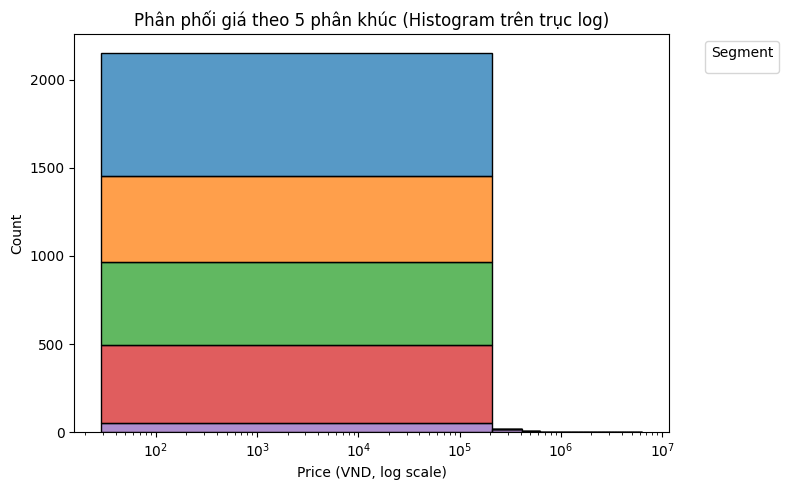

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\1064921100.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


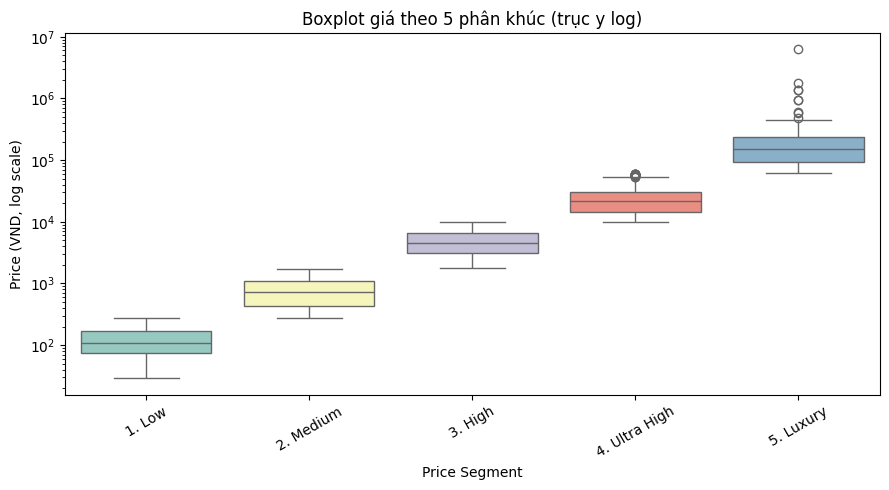

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\1064921100.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


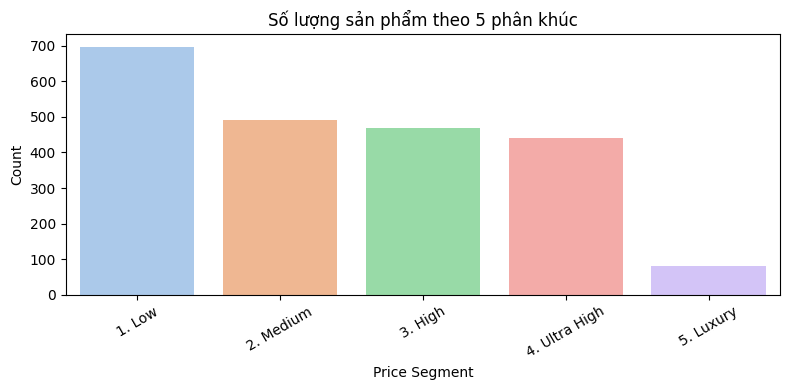

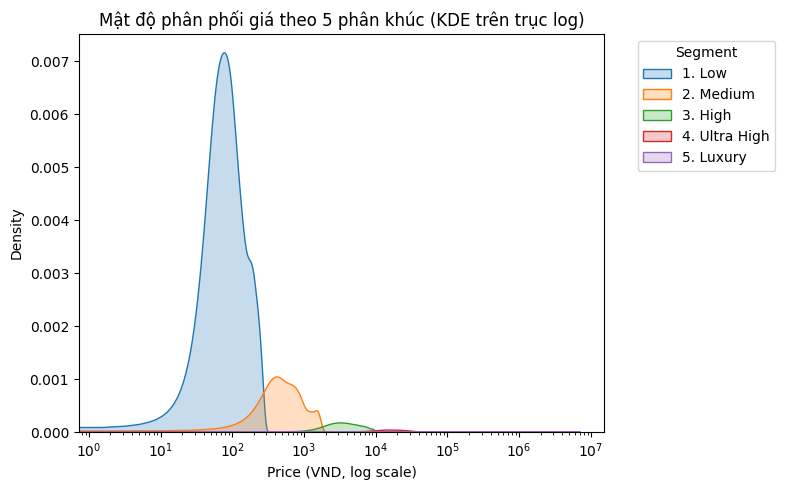

Khoảng giá thực tế (VND) cho mỗi phân khúc:
                         min         max
Price_Segment_LogKM                     
1. Low                  29.0      278.05
2. Medium              279.0     1750.00
3. High               1775.0     9805.00
4. Ultra High         9835.0    59950.00
5. Luxury            61500.0  6267500.00


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

# 1. Đọc dữ liệu
df = pd.read_csv('../data/products_cleaned_v2.csv')

# 2. Log-transform để làm mềm phân phối
#    log1p để tránh log(0) nếu có giá = 0
df['log_price'] = np.log1p(df['Price'])

# 3. Phân cụm KMeans trên log_price
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster_log'] = kmeans.fit_predict(df[['log_price']])

# 4. Tính log_price trung bình mỗi cluster rồi sắp xếp tăng dần
cluster_log_means = df.groupby('cluster_log')['log_price'].mean().sort_values()

# 5. Tạo nhãn có số thứ tự
labels = ['1. Low', '2. Medium', '3. High', '4. Ultra High', '5. Luxury']
cluster_log_map = {cluster: label for cluster, label in zip(cluster_log_means.index, labels)}

# 6. Ánh xạ cluster thành nhãn phân khúc có số
df['Price_Segment_LogKM'] = df['cluster_log'].map(cluster_log_map)

# 7. Chuẩn bị thứ tự hiển thị trên biểu đồ
order_logkm = labels

# 8. Vẽ biểu đồ

# 8.1 Histogram (trục log)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Price',
    hue='Price_Segment_LogKM',
    bins=30,
    palette='tab10',
    multiple='stack',
    hue_order=order_logkm
)
plt.xscale('log')
plt.title("Phân phối giá theo 5 phân khúc (Histogram trên trục log)")
plt.xlabel("Price (VND, log scale)")
plt.ylabel("Count")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8.2 Boxplot (trục log)
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='Price_Segment_LogKM',
    y='Price',
    order=order_logkm,
    palette='Set3'
)
plt.yscale('log')
plt.title("Boxplot giá theo 5 phân khúc (trục y log)")
plt.xlabel("Price Segment")
plt.ylabel("Price (VND, log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 8.3 Countplot (vẫn bình thường)
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='Price_Segment_LogKM',
    order=order_logkm,
    palette='pastel'
)
plt.title("Số lượng sản phẩm theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 8.4 KDE Plot (trục log)
plt.figure(figsize=(8, 5))
for seg in order_logkm:
    sns.kdeplot(
        data=df[df['Price_Segment_LogKM'] == seg]['Price'],
        label=seg,
        fill=True
    )
plt.xscale('log')
plt.title("Mật độ phân phối giá theo 5 phân khúc (KDE trên trục log)")
plt.xlabel("Price (VND, log scale)")
plt.ylabel("Density")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 9. (Tuỳ chọn) In khoảng giá gốc min–max của mỗi phân khúc sau khi log-KMeans
ranges = df.groupby('Price_Segment_LogKM')['Price'] \
           .agg(['min','max'])
print("Khoảng giá thực tế (VND) cho mỗi phân khúc:")
print(ranges)


In [106]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('../data/products_cleaned.csv')

# Xem các giá trị duy nhất trong cột giới tính (để kiểm tra chính tả)
print(df['GENDER'].unique())

# Tính giá trung bình theo từng giới tính
average_price_by_gender = df.groupby('GENDER')['Price'].mean()

# Hiển thị kết quả
print(average_price_by_gender)


['MENS' 'UNISEX' 'WOMENS']
GENDER
MENS      20683.796405
UNISEX    16877.375969
WOMENS    13196.204049
Name: Price, dtype: float64


In [ ]:
# Chuẩn hóa cột GENDER
df['GENDER'] = df['GENDER'].str.strip().str.upper()

# Tính giá trung bình theo từng giới tính
gender_target_map = df.groupby('GENDER')['Price'].mean()

# In ra để kiểm tra
print(gender_target_map)

# Áp dụng target encoding
df['gender_encoded'] = df['GENDER'].map(gender_target_map)

# Kiểm tra kết quả
print(df[['GENDER', 'gender_encoded', 'Price']].head())

GENDER
MENS      20683.796405
UNISEX    16877.375969
WOMENS    13196.204049
Name: Price, dtype: float64
  GENDER  gender_encoded    Price
0   MENS    20683.796405    534.0
1   MENS    20683.796405    534.0
2   MENS    20683.796405  27750.0
3   MENS    20683.796405     88.0
4   MENS    20683.796405   9318.0


In [108]:
print(df.shape)

(2180, 28)


In [74]:
df.to_csv('../data/products_cleaned.csv', index=False)

In [ ]:
# Encoding Case Material
case_material_target_map = df.groupby('CASE_MATERIAL')['Price'].mean()

# In ra phiên bản sort của case_material_target_map
case_material_target_map_sorted = case_material_target_map.sort_values(ascending=False)
print("Case Material Target Map (sorted):")
print(case_material_target_map_sorted)


Case Material Target Map (sorted):
CASE_MATERIAL
Baguette Diamond-Set 18kt White Gold                 1.386640e+06
Carbon TPT                                           1.380000e+06
18kt White Gold Set with 47 Baguette-cut Emeralds    4.167600e+05
18kt White Gold Diamond                              3.070650e+05
950 Platiunum                                        3.047500e+05
                                                         ...     
Composite                                            5.771500e+01
Composite Metal                                      5.592915e+01
Polished Alloy                                       5.549500e+01
Base Metal                                           5.399000e+01
Metal                                                4.683500e+01
Name: Price, Length: 143, dtype: float64


In [112]:
# Áp dung target encoding cho CASE_MATERIAL
df['case_material_encoded'] = df['CASE_MATERIAL'].map(case_material_target_map)
print("Case Material Target Encoding Applied:")
print(df[['CASE_MATERIAL', 'case_material_encoded', 'Price']].head())

Case Material Target Encoding Applied:
     CASE_MATERIAL  case_material_encoded    Price
0  Stainless Steel            4672.238381    534.0
1  Stainless Steel            4672.238381    534.0
2         Titanium           25985.754032  27750.0
3            Alloy              98.860571     88.0
4  Stainless Steel            4672.238381   9318.0


In [114]:
import pandas as pd
import numpy as np

# Nếu chưa có df, đọc lại:
# df = pd.read_csv('../data/products_cleaned_v2.csv')

# Định nghĩa hàm tính các percentiles
def q25(x):    return x.quantile(0.25)
def q50(x):    return x.quantile(0.50)
def q75(x):    return x.quantile(0.75)

# Nhóm và tính
price_stats = df.groupby('CASE_SHAPE')['Price'].agg(
    count='count',
    mean='mean',
    min='min',
    q25=q25,
    median=q50,
    q75=q75,
    max='max',
    std='std'
)

# Sắp xếp theo mean giảm dần
price_stats_sorted = price_stats.sort_values(by='mean', ascending=False)

# In kết quả
print("🔍 Thống kê giá theo CASE_SHAPE (sorted by mean):")
print(price_stats_sorted.round(0))  # làm tròn cho dễ đọc


🔍 Thống kê giá theo CASE_SHAPE (sorted by mean):
            count      mean    min      q25   median       q75        max  \
CASE_SHAPE                                                                  
Octagon        21  186162.0  654.0  50025.0  74750.0  115540.0  1386640.0   
Cushion        37   69813.0   82.0   3995.0   7050.0   18350.0  1782500.0   
Unique         20   51718.0   50.0    354.0   2812.0   27382.0   332855.0   
Rectangle     103   33329.0   41.0    594.0   3650.0   18672.0   445280.0   
Tonneau        57   30187.0   48.0    191.0    534.0    6902.0  1380000.0   
Oval           26   21689.0   59.0    295.0   1395.0   27509.0   255000.0   
Round        1805   13654.0   29.0    166.0    950.0    7595.0  6267500.0   
Square         91   12889.0   62.0   1216.0   4205.0    9445.0   220455.0   
Dodecagon      12    3662.0   56.0    130.0   2293.0    2812.0    22425.0   
Triangle        1     689.0  689.0    689.0    689.0     689.0      689.0   

                 std  
CAS

In [115]:
# Case Shape have big impact on price, drop it
df.drop(columns=['CASE_SHAPE'], inplace=True)

In [116]:
df.shape

(2180, 28)

Price
Giá bán (hoặc niêm yết) của đồng hồ, thường là giá thực tế bạn muốn dự đoán hoặc phân khúc.

CASE_MATERIAL
Vật liệu chế tác vỏ đồng hồ (case). Ví dụ: Thép không gỉ, Titanium, Vàng, Gốm ceramic, Đồng (Bronze)…

Band Material
Vật liệu dây đeo (strap/bracelet). Ví dụ: Da, Cao su (Rubber), Thép không gỉ, Nylon (NATO), Silicone…

Case Back
Kiểu lưng vỏ đồng hồ:

“Solid” (đặc)

“Exhibition” (kính trong, lộ máy)

“Screw-down” (vặn vít)

“Snap-on” (bấm)

BEZEL MATERIAL
Vật liệu vành bezel (vành xoay hoặc cố định) quanh mặt kính. Ví dụ: Nhôm, Gốm ceramic, Thép không gỉ, Vàng…

BRAND
Thương hiệu (Rolex, Omega, Seiko, Casio…). Yếu tố quan trọng quyết định phần lớn giá trị và uy tín.

GENDERS
Đối tượng hướng tới: “Men’s” (nam), “Women’s” (nữ) hoặc “Unisex” (cả hai).

MOVEMENT
Loại máy bên trong:

Quartz (pin)

Automatic (tự động lên dây)

Manual (lên dây tay)

Solar (năng lượng mặt trời)

Kinetic (cơ – điện)…

WATCH STYLE
Phong cách thiết kế: Diver (lặn), Dress (formal), Chronograph (bấm giờ), Pilot (phi công), Field (đồng hồ quân đội), Smartwatch, Skeleton (lộ máy)…

CASE DIAMETER
Đường kính vỏ đồng hồ (tính qua mặt số) tính bằng millimeter (mm).

WATER RESISTANCE
Khả năng chịu nước, thường thể hiện bằng mét (m) hoặc ATM (atmospheres). Ví dụ: 30 m, 100 m, 300 m…

CASE THICKNESS
Độ dày vỏ (từ đáy đến mặt kính) tính bằng millimeter (mm).


# 1. Feature Engineering


### Get Most important features of a Clock


In [119]:
import pandas as pd

# Giả sử df là DataFrame gốc
cols = [
    'Price',
    'CASE_MATERIAL',
    'BAND_MATERIAL',
    'CASE_BACK',
    'BEZEL_MATERIAL',
    'BRAND',
    'GENDER',
    'MOVEMENT',
    'WATCH_STYLE',
    'CASE_DIAMETER',
    'WATER_RESISTANCE',
    'CASE_THICKNESS'
]

# Lấy ra subset
df_sub = df[cols].copy()

# Chuẩn hóa tên cột về lowercase + underscore
df_sub.columns = (
    df_sub.columns
    .str.strip()                                  # Bỏ khoảng trắng đầu-cuối
    .str.lower()                                  # Chuyển về chữ thường
    .str.replace(r'[^a-z0-9]+', '_', regex=True)  # Thay ký tự lạ (space, slash, v.v.) thành "_"
    .str.strip('_')                               # Bỏ "_" dư đầu-cuối
)

print(df_sub.columns)
# Index(['price', 'case_material', 'band_material', 'case_back',
#        'bezel_material', 'brand', 'genders', 'movement',
#        'watch_style', 'case_diameter', 'water_resistance',
#        'case_thickness'], dtype='object')


KeyError: "['CASE_THICKNESS'] not in index"